In [13]:
import xarray as xr
import glob
import matplotlib.pyplot as plt
from ipywidgets import interact 


In [22]:
# http://tds0.ifremer.fr/thredds/dodsC/IFREMER-NWS-SST-L4-NRT-OBS_FULL_TIME_SERIE.html
# http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&view=details&product_id=SST_NWS_SST_L4_NRT_OBSERVATIONS_010_003

In [8]:
data = xr.open_mfdataset(glob.glob("../CMEMS_SST/2017/*/*.nc"))

In [20]:
def plot_timeslice(time_index=1,var_name=['analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction']):
    data[var_name][time_index].plot(figsize=(18,9), aspect='auto')
    

In [21]:
interact(plot_timeslice, time_index=(0, data.time.size -1,1))

interactive(children=(IntSlider(value=1, description='time_index', max=364), Dropdown(description='var_name', …

<function __main__.plot_timeslice(time_index=1, var_name=['analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction'])>

In [17]:
data

<xarray.Dataset>
Dimensions:           (lat: 1350, lon: 1600, time: 365)
Coordinates:
  * lat               (lat) float32 38.01 38.03 38.05 38.07 38.09 38.11 ...
  * lon               (lon) float32 -17.99 -17.97 -17.95 -17.93 -17.91 ...
  * time              (time) datetime64[ns] 2017-01-01 2017-01-02 2017-01-03 ...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<shape=(365, 1350, 1600), chunksize=(1, 1350, 1600)>
    analysis_error    (time, lat, lon) float32 dask.array<shape=(365, 1350, 1600), chunksize=(1, 1350, 1600)>
    mask              (time, lat, lon) float32 dask.array<shape=(365, 1350, 1600), chunksize=(1, 1350, 1600)>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<shape=(365, 1350, 1600), chunksize=(1, 1350, 1600)>
Attributes:
    CONVENTIONS:                CF-1.4
    title:                      Odyssea Sea Surface Temperature Analysis
    summary:                    Multisensor optimal interpolation of sea surf...
    id:              

C:\Users\gunnar\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


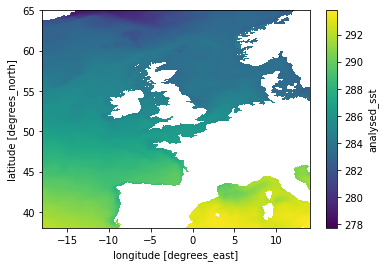

In [24]:
data.analysed_sst.mean(dim='time').plot()